Basic Imports

In [4]:
import pandas
import marketData
import Orders
import Plot
import Indicators

Adding indicators

In [4]:
#df = marketData.getPrices("BTCUSDT", "1m", 78)
df = pandas.read_csv("Data/BTCUSDT1m.csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df = df.iloc[27:]
df.to_csv("Data/BTCUSDT1mQ.csv")
print("Done!")


Done!


Getting order book

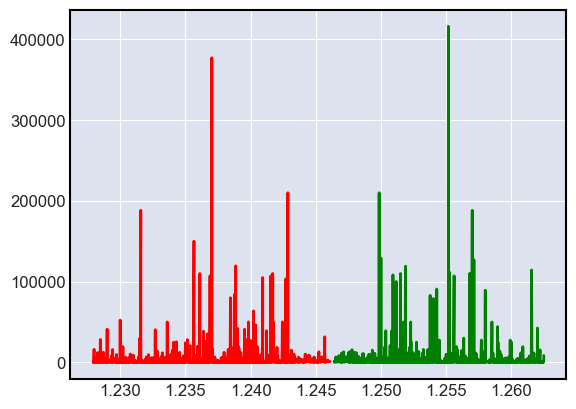

In [28]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])

Getting historical data and computing indicators

In [5]:
import time

#Time to nanoseconds
pair = "BTCUSDT"
timeframe = "1m"
current = time.time() * 1000
current = round(current)

#Time step for requests
block = 500*60*1000
current -= block
amount = 15

#Populating latest
df = marketData.getPrices(pair, timeframe, 500)
for i in range(0, amount):
    print(str((i+1 / amount)*100)+"%")
    df = df.append(marketData.getHistorical(pair, timeframe, current - block, current))
    current -= block

df = df.sort_index()
df.to_csv("Data/"+pair+timeframe+".csv")

print("Done fetching")


df = pandas.read_csv("Data/"+pair+timeframe+".csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df = df.iloc[27:]
df.to_csv("Data/"+pair+timeframe+"Q.csv")

print("Done adding indicators")

0.06666666666666667%
1.0666666666666667%
2.066666666666667%
3.066666666666667%
4.066666666666666%
5.066666666666666%
6.066666666666666%
7.066666666666666%
8.066666666666666%
9.066666666666666%
10.066666666666666%
11.066666666666666%
12.066666666666666%
13.066666666666666%
14.066666666666666%
Done fetching
Done adding indicators


Using Keras

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


dataset = pd.read_csv("Data/dataset.csv").apply(pd.to_numeric)
labels = dataset.pop("Position").to_numpy()
dataset.pop("0")
dataset = dataset.to_numpy()
print(dataset.shape)



model = tf.keras.models.Sequential([
    keras.layers.Dense(400, activation="sigmoid"),
    keras.layers.Dense(600, activation="sigmoid"),
    #tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(600),
    keras.layers.Dense(400),
    keras.layers.Dense(100),
    keras.layers.Dense(3, activation="softmax")
])

print("Compiling model")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Checkpointing
checkpoint_path = "checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)
#model.load_weights(checkpoint_path)

print("Fitting")
model.fit(dataset, labels, epochs=10, callbacks=[cp_callback])


(250402, 400)
Compiling model
Fitting
Epoch 1/10
250402/250402 [==============================] - 18s 73us/sample - loss: 1342568626.9889 - acc: 0.3337

preparing as a single csv

In [7]:
import pandas as pd
features = pd.read_csv("Data/values.csv")
labels = pd.read_csv("Data/labels.csv")
labels.columns=["Position"]

df = pd.concat([features,labels], axis=1)
print(df)
df.to_csv("Data/validationdataset.csv")
print("Done!")

             0         1         2         3         4         5         6  \
0    -0.011494 -0.004601 -0.004545 -0.003811 -0.138883  0.404203  0.377861   
1    -0.003811 -0.001786 -0.002821 -0.001461 -0.029144  0.348307  0.384022   
2    -0.001461  0.014247  0.011432  0.017140 -0.072332  0.183738  0.312082   
3     0.017137  0.023745  0.020127  0.018608  0.009669  0.155871  0.229305   
4     0.017811  0.010762  0.015036  0.016048 -0.217695  0.179464  0.173024   
...        ...       ...       ...       ...       ...       ...       ...   
7911 -0.119808 -0.121856 -0.115007 -0.115852 -0.159112 -0.255568 -0.220168   
7912 -0.115855 -0.131469 -0.123119 -0.132527 -0.063707 -0.187549 -0.244146   
7913 -0.132527 -0.142151 -0.136942 -0.143133 -0.114530  0.053793 -0.129775   
7914 -0.143524 -0.137693 -0.129335 -0.135497 -0.111211  0.206358  0.024201   
7915 -0.135499 -0.132384 -0.121948 -0.129037 -0.027916  0.212654  0.157602   

             7         8         9  ...       391  392  393  39

Bot testing

In [ ]:
import bot
bot = bot.bot("BTCUSDT", "model", 30)

Bot started
Bot scheduled for 30m
2021-03-20 20:29:00.036165
Neutral: 0.9889253973960876 Long: 0.001499305129982531 Short: 0.009575344622135162
2021-03-20 20:30:00.689813
Neutral: 0.9718852639198303 Long: 0.0037365637253969908 Short: 0.02437821589410305
2021-03-20 20:31:00.191554


testing bridge

In [6]:
import bridge
import marketData


df = marketData.getPrices("BTCUSDT", "1m", 1)
lastprice = df["Close"][0]

amount = 200/lastprice.item() # Dollar amount * Leverage

bridge = bridge.bridge("http://testnet.binancefuture.com", "BTCUSDT")
bridge.takePosition("SELL", lastprice * 0.9985, lastprice * 1.001, amount)

order = bridge.orders[0]
response = bridge.orderStatus(order)
print(response)


BUY 0.003
{'orderId': 2660252962, 'symbol': 'BTCUSDT', 'status': 'NEW', 'clientOrderId': 'hoxRtQe5zoy4t9XX3qp7rp', 'price': '0', 'avgPrice': '0.00000', 'origQty': '0.003', 'executedQty': '0', 'activatePrice': '59138.30', 'priceRate': '0.1', 'cumQuote': '0', 'timeInForce': 'GTC', 'type': 'TRAILING_STOP_MARKET', 'reduceOnly': True, 'closePosition': False, 'side': 'BUY', 'positionSide': 'BOTH', 'stopPrice': '59232.23', 'workingType': 'CONTRACT_PRICE', 'priceProtect': False, 'origType': 'TRAILING_STOP_MARKET', 'time': 1616266717092, 'updateTime': 1616266717092}
